Importing All the required Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Accessing train.csv using pandas and storing it as df

In [3]:
df = pd.read_csv(r"C:\Users\kundu\Desktop\House Price Prediction Project\train.csv") 
df.head()
print("Shape of dataset:", df.shape)

df.info()
df.describe()

Shape of dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# In the data their some values missing so we are droping those columns
# Droping columns with too many missing values (more than 30%)
null_percent = df.isnull().sum() / len(df) * 100
drop_cols = null_percent[null_percent > 30].index
df.drop(columns=drop_cols, inplace=True)

# Drop rows with any remaining nulls for now
df.dropna(inplace=True)
# converts categorical columns into binary dummy variables (0/1) and drops the first category of each to avoid repetation
# making the data suitable for machine learning models.
df = pd.get_dummies(df, drop_first=True)

In [5]:
X = df.drop('SalePrice', axis=1) # All columns execpt 'SalePrice'
y = df['SalePrice'] # Only 'SalePrice' Column
# Spliting the data into two parts (train and test) to get the accuracy 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Doing Linear Regression by minimizing MSE
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.9092683013640873
RMSE: 26125.061661723226


In [7]:
# Ridge
# In case if their is overfiting using Ridge will more accurate
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression R2: 0.8823844857781431
RMSE: 29744.735350015093


In [8]:
# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression R2: 0.9092797944039379
RMSE: 26123.406970538606


c:\Users\kundu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.047e+11, tolerance: 5.912e+08
  model = cd_fast.enet_coordinate_descent(


In [9]:
# Decision Tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

Decision Tree R2: 0.8239800782483817
RMSE: 36388.04433296522


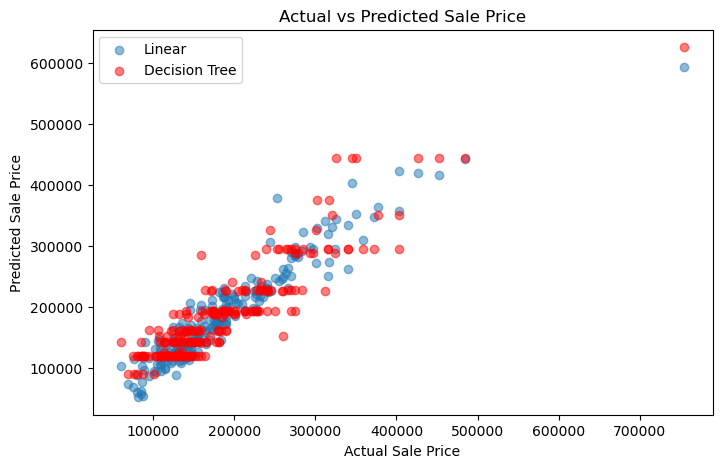

In [10]:
# Ploting to compare Linear regression and Decision tree
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear")
plt.scatter(y_test, y_pred_tree, alpha=0.5, label="Decision Tree", color='red')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.show()

In [11]:
# Create a DataFrame to compare coefficients
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
})

# Sort by absolute Linear coef
# Droping it after, as it is only to sort the coef by ther magnitude value
coefs['Abs_Lin'] = np.abs(coefs['Linear'])
sorted_coefs = coefs.sort_values(by='Abs_Lin', ascending=False)
sorted_coefs.drop('Abs_Lin', axis=1).head(10)

,Feature,Linear,Ridge,Lasso
107,RoofMatl_Membran,830634.854362,27287.239116,829415.372564
111,RoofMatl_WdShngl,733564.484736,78185.568499,733670.394530
109,RoofMatl_Tar&Grv,727448.845648,19174.274842,726461.415968
108,RoofMatl_Roll,714215.041643,28671.635411,714378.417057
106,RoofMatl_CompShg,706972.934758,48674.612073,706809.335173
110,RoofMatl_WdShake,686828.113414,7058.453890,686456.700620
89,Condition2_PosN,-240956.244801,-78783.151195,-240952.389374
198,GarageQual_Po,-190989.284101,-17241.366643,-189058.237785
202,GarageCond_Po,154784.340105,4537.597745,153368.116866
197,GarageQual_Gd,-135585.955970,-1772.229866,-134314.404125


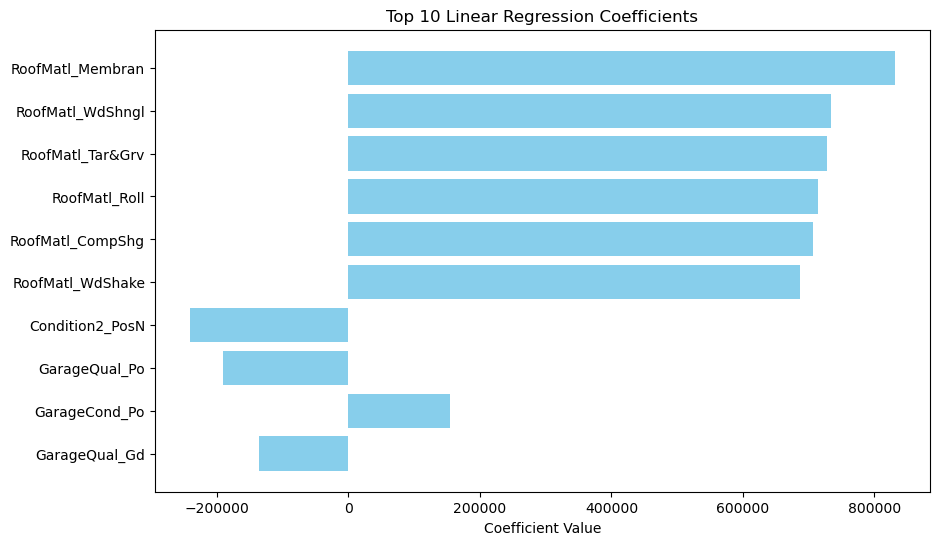

In [12]:
# Ploting the top 10 significant features with their respective coef value for linear Regression
top_features = coefs.sort_values(by='Abs_Lin', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Linear'], color='skyblue')
plt.title('Top 10 Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

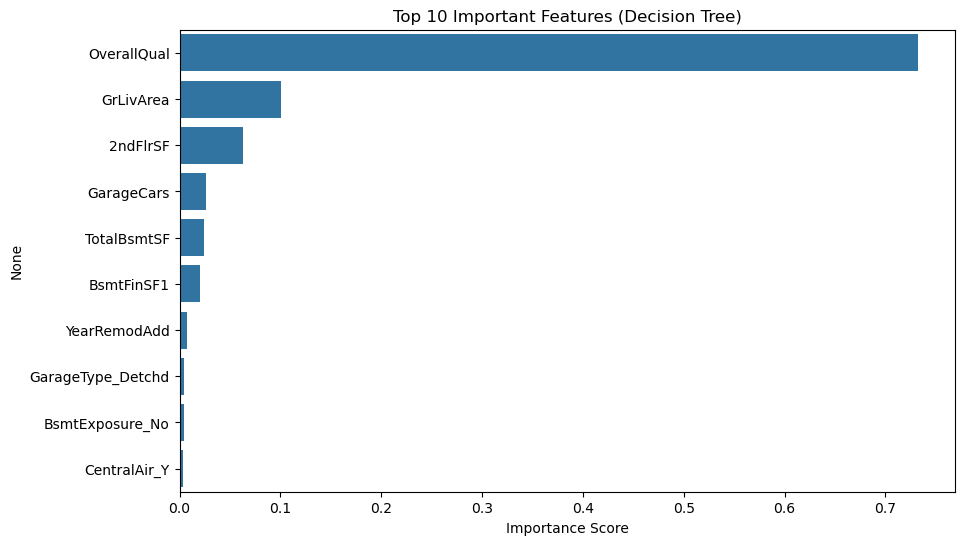

In [13]:
# top 10 features in Decision tree
importances = tree.feature_importances_
features = pd.Series(importances, index=X.columns)
top_tree_features = features.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_tree_features.values, y=top_tree_features.index)
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()